In [1]:
%pdb off
import os,io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def readGrant():
    data = pd.read_excel('/home/calvin/Documents/vuletic/grasp2K_v1_1/manual/grant/6s2-levels.xlsx',header=0)
    return dict(zip(data['Subshell'],data['e']))

def readGrasp(filename = 'grasp399.sum', nskip = 31, n_orbs = 29, graspdir = '/home/calvin/Documents/vuletic/2fdf8180c6ee229ae52c44f09cbcf802bde17eccgrasp2K_v1_1/manual/example5test'):
    

    data = pd.read_csv(os.path.join(graspdir,filename),skiprows = nskip,nrows= n_orbs,delim_whitespace=True)
    data['e'] = [float(energy.replace('D','E',1)) for energy in data['e']]
    #return data['Subshell'].values,data['e'].values
    return dict(zip(data['Subshell'],data['e']))



Automatic pdb calling has been turned OFF


In [7]:
pd.read_csv(os.path.join('/home/calvin/Documents/vuletic/172Yb/172Yb','1S0.sum'),skiprows=29,nrows=10)

,Subshell e p0 gamma P(2) Q(2) Consistency MTP
0,1s 2.2676481306D+03 2.334D+03 1.00 3.41...
1,2s 3.8888882241D+02 8.677D+02 1.00 1.27...
2,2p- 3.7005142312D+02 5.091D+01 1.00 1.38...
3,2p 3.3148360915D+02 1.138D+04 2.00 2.44...
4,3s 8.9705858324D+01 4.084D+02 1.00 5.98...
5,3p- 8.1418571053D+01 2.530D+01 1.00 6.88...
6,3p 7.3090319939D+01 5.787D+03 2.00 1.24...
7,3d- 5.9188260225D+01 5.559D+01 2.00 4.43...
8,3d 5.7386924892D+01 2.005D+04 3.00 6.30...
9,4s 1.8668916592D+01 1.982D+02 1.00 2.90...


In [19]:
def compare(test,master):
    frac = {}
    for key in master.keys():
        try:
            frac[key] = (test[key] - master[key]) / np.abs(master[key])
        except KeyError:
            frac[key] = 0
    return frac
def compareDelta(test,master):
    delta = {}
    for key in master.keys():
        try:
            delta[key] = test[key] - master[key]
        except KeyError:
            delta[key] = 0
    return delta

def plotCompare(D):
    # sort first by abs value
    keys = np.array(list(D.keys()))
    vals = np.array(list(D.values()))
    args = np.argsort(np.abs(vals))
    color = ['b' if np.sign(val) > 0 else 'r' for val in vals]
    plt.barh(range(len(D)), np.abs(vals[args]), align='center',color=color)
    plt.yticks(range(len(D)), keys[args])
    plt.xscale('log')
    plt.xlim([1e-8,1])
    plt.xlabel('Fractional error')
grant = readGrant()

Text(0.5, 1.0, '/home/calvin/Documents/vuletic/172Yb/172Yb/1S0.sum textbook comparison')

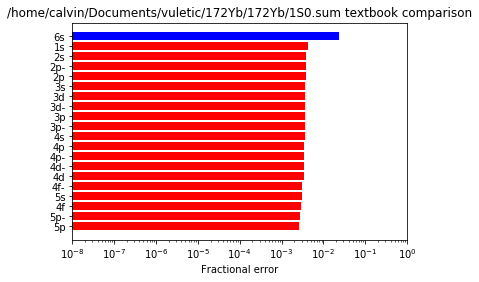

In [20]:
#plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(15,15))

#plt.subplot(211)
graspdir = '/home/calvin/Documents/vuletic/172Yb/172Yb'
sumName = '1S0.sum'
master = readGrasp(sumName,graspdir = graspdir,nskip=29, n_orbs = 26)
frac1 = compareDelta(master,grant)
plotCompare(frac1) 
plt.title(os.path.join(graspdir,sumName) + ' textbook comparison')

#plt.subplot(212)
#readout = readGrasp('readout.sum',nskip=31)
#frac2 = compareDelta(readout,grant)
#plt.title('readout.sum (Test Run)')

#shell = '6s'
#print(master[shell],readout[shell])
#print('book:',grant[shell])
#plotCompare(frac2)


In [ ]:
readout = readGrasp('readout.sum')
readout


In [ ]:
graspreadout['1s']

In [ ]:
grant['1s']